# Base Module: TsRelBreakBase

In [16]:
#todo:
    # add interactive example with test data
    # add interactive example with real data

The base module provides functions for data handling, bias correction and plotting. Other classes for break testing and adjusting use the base class directly (as they inherit from it) or indirectly (as the use an object that inherits from the base class).
The TsRelBreakBase object takes a single candidat and one refernce time series and a (potential) break time and arguments for scaling (bias correction of the reference to match the candidate) and for handling missing values. The break time is used to separate the candidate and reference (that are combined in the main data frame) into 2 parts: group 0 is before the passed break and group 1 is afterwards. 

The main functions are described in detail

In [54]:
from set_up import *
from pybreaks.base import TsRelBreakBase
import pandas as pd
pd.options.display.max_rows=7
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import datetime
#from IPython.html.widgets import interact
#import ipywidgets as widgets


Loads either real ESA CCI SM and MERRA2 surface water observations or test data.

In [56]:
# this cell loads either test data with properties as se by the user or real data and allows to introduce a break
REAL_DATA=True
TESTDATA_TREND = 0.05
TESTDATA_BIAS = 10
BREAKTIME = datetime(2001,12,31)
BREAKSIZE = (0.2, 1.2) # (addite, multiplicative)

if REAL_DATA:
    can, ref = load_real_data(707393, BREAKTIME, BREAKSIZE)
else:
    can, ref = load_test_data(TESTDATA_TREND, TESTDATA_BIAS, BREAKTIME, BREAKSIZE)



This cell sets up the Base by passing the data. We pass a potential break time that is stored in the object and used later to separate the main dataframe ("df_original") into 2 parts between which a relative bias (break) exists and that are tested/corrected with respect to each other (see descriptions of BreakTesting and Correction). When creating the object, we can pass a method to scale biases in the refererence to the candidate (which stays unchanged). Possible options are:
- "mean_std" to scale based on matching the mean and standard deviation of the reference to the candidate
- "min_max" to scale by matching the minimum and maximum of the candidate to the reference
- "linreg" to scale by matching the regression parameters of the reference with respect to the candidate.
- "cdf_match" to change the reference so that the CDF matches the one of the candidate. We use the preset percentiles 0, 5, 10, 30, 50, 70, 90, 95, 100 .


In [57]:
base = TsRelBreakBase(candidate=can, reference=ref, breaktime=BREAKTIME, bias_corr_method='cdf_match')

In [58]:
# calculte a difference series from the candidate and reference
delta = base.calc_diff(base.df_original)
display(delta)

,Q
1980-01-12,0.178640
1980-01-18,0.203837
1980-02-25,0.121851
...,...
2018-06-28,0.009428
2018-06-29,0.018539
2018-06-30,-0.043269


In [59]:
# get candidate and reference data before the break
g0_data = base.get_group_data(0, base.df_original, 'all')
# get candidate and reference data after the break
g1_data = base.get_group_data(1, base.df_original, 'all')
display(g0_data)

,ESA CCI SM v04.4 (COMBINED),MERRA2 SFMC
1980-01-12,0.596396,0.417756
1980-01-18,0.625285,0.421448
1980-02-25,0.615078,0.493226
...,...,...
2001-12-23,0.632214,0.655815
2001-12-28,0.623120,0.608916
2001-12-29,0.623120,0.607391


In [60]:
# get stats, metrics and changes in metrics for the 2 groups and between them
group_stats, metrics, metric_changes = base.get_validation_stats(base.df_original)
display(group_stats)
display(metrics)
display(metric_changes)

,group0,group1,FRAME
min_ESA CCI SM v04.4 (COMBINED),0.322124,0.102550,0.102550
max_ESA CCI SM v04.4 (COMBINED),0.754940,0.446652,0.754940
var_ESA CCI SM v04.4 (COMBINED),0.004632,0.003258,0.016436
...,...,...,...
mean_MERRA2 SFMC,0.413173,0.352953,0.368662
median_MERRA2 SFMC,0.362016,0.333662,0.339978
iqr_MERRA2 SFMC,0.217811,0.106261,0.146537


,group0,group1,FRAME
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_bias,-0.149044,0.048588,-0.002966
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_mad,0.172451,0.041950,0.056813
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_rmsd,0.196703,0.106765,0.136083
...,...,...,...
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_max_Diff,0.024103,-0.308288,0.000000
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_var_Ratio,0.245583,0.231145,1.024933
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_iqr_Ratio,0.430314,0.757986,0.905743


ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_mean_Diff      0.197632
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_median_Diff    0.230512
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_min_Diff       0.190409
                                                                 ...   
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_mad            0.130501
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_rmsd           0.089938
ESA CCI SM v04.4 (COMBINED)_MERRA2 SFMC_AbsDiff_nrmsd          0.151969
Length: 10, dtype: float64

There are alos plotting function available in the base for plotting the main data frame with and without a set of calculated statistics. These functions are available for all other classes that inherit from the base and will be of use especially during adjustment.

In [61]:
# this cell creates wrappers of the plotting functions
def plot_ts(base, resample='M'):
    # add here the function from the base class for plotting
    fig,ax = plt.subplots(1,1)
    base.plot_ts(frame=base.df_original, title='Main DataFrame', ax=ax)
    ax.grid(color='w', linewidth=2, linestyle='solid')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    plt.close('all')
    return fig

def plot_stats_ts(base):
    # add here the function from the base class for plotting
    base.plot_ts(frame=base.df_original, title='Main DataFrame')
    fig = base.plot_stats_ts(base.df_original, kind='line', save_path=None, title='Main DataFrame Stats')
    plt.close('all')
    return fig

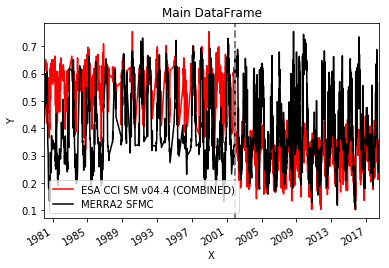

In [62]:
#Function reference_bias_correction(self, frame, method='linreg', group=None)
plot_ts(base, 'M')


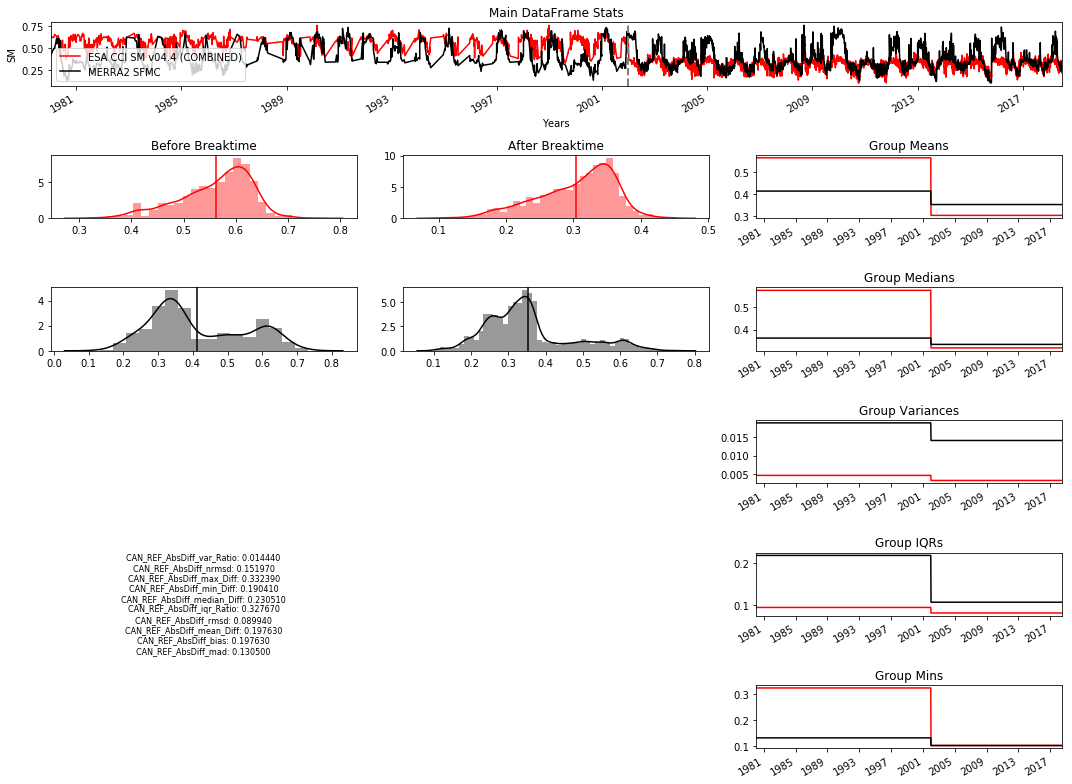

In [63]:
plot_stats_ts(base)